# Linear Regression

* y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다. [참고: 위키피디아](https://ko.wikipedia.org/wiki/선형_회귀)

$$y_{\textrm{pred}} = \boldsymbol{W}^{\top}\boldsymbol{x} + b$$

* $\boldsymbol{x} = [x_{1}, x_{2}, \cdots, x_{d}]$
* $\boldsymbol{W} = [w_{1}, w_{2}, \cdots, w_{d}]$
* Loss function: $\mathcal{L} = \sum^{N} (y_{\textrm{pred}} - y)^{2}$

## Training Pseudo Code

```python
for epoch in max_epochs: # 1 epoch: 모든 데이터(N)를 한번 학습 시켰을 때
  for step in num_batches: # num_batches = int(data_size / batch_size)
    1. sampling mini-batches with batch_size
      1-1. data augmentation (필요하면)
    2. calculate loss
    3. calculate the gradient with respect to weights
    4. update weights
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

tf.set_random_seed(219)
np.random.seed(219)

/Users/shatapy/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/shatapy/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Phase 1. Build a model

### Make data

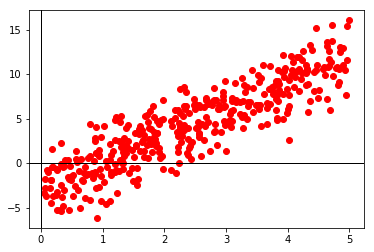

In [118]:
_a = 3
_b = -3
N = 400
data_X = np.random.uniform(low=0, high=5, size=N)
data_y = _a * data_X + _b + np.random.normal(0, 2, N)

# data_X = np.reshape(data_X, [len(data_X), ])

plt.plot(data_X, data_y, 'ro')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

# tf.data.Dataset

In [149]:
dataset = tf.data.Dataset.from_tensor_slices((data_X, data_y))

In [151]:
print(dataset)
print(dataset.output_types)
print(dataset.output_shapes)

<TensorSliceDataset shapes: ((), ()), types: (tf.float64, tf.float64)>
(tf.float64, tf.float64)
(TensorShape([]), TensorShape([]))


### Create placeholders for inputs and labels

In [119]:
tf.reset_default_graph()

In [120]:
# 여기를 직접 채워넣으시면 됩니다.
# X: inputs
x = tf.placeholder(tf.float32, name='x', shape=[])

# y: labels
y = tf.placeholder(tf.float32, name='y')

In [121]:
print(data_X.shape)

(400,)


better to specify the shape  
shape가 [1] 일 땐 (1, )  
shape가 []일 땐 scalar

# Variable vs get_variable

tf.Variable의 경우엔 이미 선언된 변수(이름)이 존재하는데 그래프를 또 실행하면 에러가 난다.  
tf.get_variable의 경우엔 위 상황이어도 그래프를 또 실행하면 새로운 이름을 만들어준다. 

### Create weight and bias

In [122]:
# 여기를 직접 채워넣으시면 됩니다.
# create Variables
W = tf.get_variable(name='W1', shape=[], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable(name='b1', shape=[], initializer=tf.zeros_initializer())

### Build a model: $y = Wx + b$

In [123]:
with tf.variable_scope('y_pred'):
    y_pred = x * W + b

### Define loss function

In [142]:
def huber_loss(pred, y, delta=14.0):
    res = tf.abs(pred - y)
    def f1(): return 0.5 * tf.square(res)
    def f2(): return delta * res - 0.5 * tf.square(delta)
    return tf.cond(res < delta, f1, f2)

In [143]:
def mse(pred, y):
    return tf.square(pred - y)

In [144]:
# 여기를 직접 채워넣으시면 됩니다.
# loss = xent_loss(y_pred, y)
loss = mse(y_pred, y)

### Create a optimizer

In [145]:
# 여기를 직접 채워넣으시면 됩니다.
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

## Phase 2. Train a model

### Train a model

In [146]:
with tf.Session(config=sess_config) as sess:
  # Initialize all variables
  sess.run(tf.global_variables_initializer())
  
  writer = tf.summary.FileWriter('graphs/01_linear_reg', sess.graph)
  writer.close()
  
  # train the model
  max_epochs = 200
  total_losses = []
  for epoch in range(max_epochs+1):
    total_loss = 0.0

    # 모든 데이터를 random하게 섞는다.
    shuffle_index = np.random.permutation(len(data_X))
    
    for i in shuffle_index:
      x_ = data_X[i]
      y_ = data_y[i]
      # `sess.run` 부분을 직접 채워넣으시면 됩니다.
      _, loss_ = sess.run([train_op, loss], feed_dict={x:x_, y:y_})
      total_loss += loss_
      
    total_loss /= len(data_X)
    total_losses.append(total_loss)
    
    if epoch % 10 == 0:
      print('Epoch %d: total_loss: %f' % (epoch, total_loss))
      
  print('training done!')
      
  W_, b_ = sess.run([W, b])

Epoch 0: total_loss: 31.101547
Epoch 10: total_loss: 4.470271
Epoch 20: total_loss: 4.398205
Epoch 30: total_loss: 4.482531
Epoch 40: total_loss: 4.448206
Epoch 50: total_loss: 4.433000
Epoch 60: total_loss: 4.460480
Epoch 70: total_loss: 4.467008
Epoch 80: total_loss: 4.448770
Epoch 90: total_loss: 4.458715
Epoch 100: total_loss: 4.447642
Epoch 110: total_loss: 4.444761
Epoch 120: total_loss: 4.462029
Epoch 130: total_loss: 4.439118
Epoch 140: total_loss: 4.472201
Epoch 150: total_loss: 4.442286
Epoch 160: total_loss: 4.474077
Epoch 170: total_loss: 4.435270
Epoch 180: total_loss: 4.452008
Epoch 190: total_loss: 4.474171
Epoch 200: total_loss: 4.435933
training done!


### Print the results: W and b

* 정답 W = 3, b = -3

In [147]:
print(W_, b_)  # with huber loss

2.958481 -2.8326435


In [141]:
print(W_, b_)  # with mse

2.9453719 -2.8247204


### Plot the loss funtion

In [ ]:
plt.plot(total_losses, label='total_loss')
plt.legend()
plt.show()

### Plot the results

In [ ]:
plt.plot(data_X, data_y, 'ro', label='Real data')
plt.plot(data_X, W_ * data_X + b_, lw=5, label='model')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.legend()
plt.show()